In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("./accidents_2005_to_2007.csv",low_memory=False)
df2 = pd.read_csv("./accidents_2009_to_2011.csv",low_memory=False) #Veriler farklı yıllara göre ayrıldığı 
df3 = pd.read_csv("./accidents_2012_to_2014.csv",low_memory=False)  #için öncelikle onları bir araya getirmemiz gerekiyor.


In [3]:
data_frame= pd.concat([df1,df2,df3])

In [4]:
data_frame.shape

(1504150, 33)

In [5]:
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [6]:
data = data_frame.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Date','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1)

In [7]:
data.info()
data.describe().T
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Accident_Severity        1504150 non-null  int64 
 1   Number_of_Vehicles       1504150 non-null  int64 
 2   Number_of_Casualties     1504150 non-null  int64 
 3   Day_of_Week              1504150 non-null  int64 
 4   Time                     1504033 non-null  object
 5   Road_Type                1504150 non-null  object
 6   Light_Conditions         1504150 non-null  object
 7   Weather_Conditions       1504024 non-null  object
 8   Road_Surface_Conditions  1502192 non-null  object
 9   Urban_or_Rural_Area      1504150 non-null  int64 
 10  Year                     1504150 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 137.7+ MB


,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,17:42,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,4,17:36,Dual carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,5,00:15,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,6,10:35,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,2,21:13,Single carriageway,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005
5,3,2,1,3,12:40,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
6,3,2,1,5,20:40,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
7,3,1,2,6,17:35,Dual carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
8,3,2,2,7,22:43,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
9,3,2,5,7,16:00,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005


In [8]:
data.isnull().sum() #Sütunlardaki boş verilerin kaç tane olduğunu görmemiz gerekiyor.

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [9]:
data.dropna(inplace=True) #Boş değerleri veri setinden çıkaralım.
data.isnull().sum()

Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Time                       0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

#### Günlere ve yıllara göre trafik kaza sayıları

In [10]:
year = data["Year"].value_counts() 
year

2005    198474
2006    188913
2007    181881
2012    179436
2009    163334
2010    154185
2011    151241
2014    146100
2013    138393
Name: Year, dtype: int64

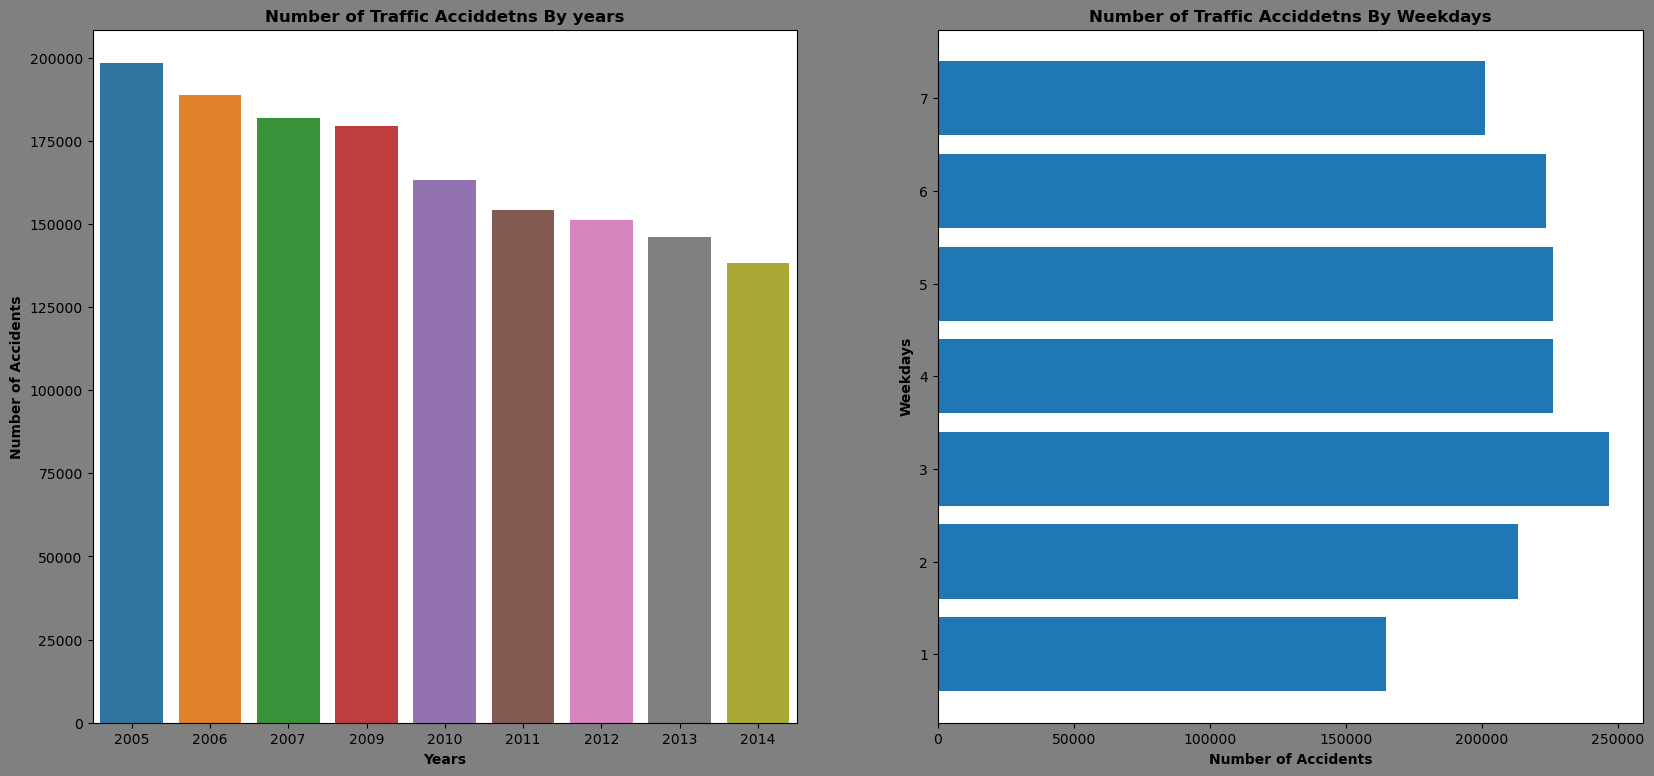

In [11]:
import seaborn as sns
year = data["Year"].value_counts() 

years = data["Year"].unique()
num = year.values

week = data["Day_of_Week"].value_counts()
week
weeks = data["Day_of_Week"].unique()
num_w = week.values

plt.figure(figsize = (20,9),facecolor='grey')

plt.subplot(1, 2, 1)

sns.barplot(x = years, y = num)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Years",weight="bold")

plt.title("Number of Traffic Acciddetns By years",weight="bold")

plt.subplot(1, 2, 2)

plt.barh(weeks,num_w)
plt.title("Number of Traffic Acciddetns By Weekdays",weight="bold")
plt.xlabel("Number of Accidents",weight="bold")
plt.ylabel("Weekdays",weight="bold")
plt.show()

- Günlere ve yıllara göre kaza sayıarını grafikte görebiliriz. Geel olarak bi azalma olduğunu (yıllara göre) görebilriz.
- Haftanın güneri içinse yğunluk haftasonunda olduğunu söyleyebiliriz.

### Kırsal ve kentsel alanlar nasıl farklılaştı?

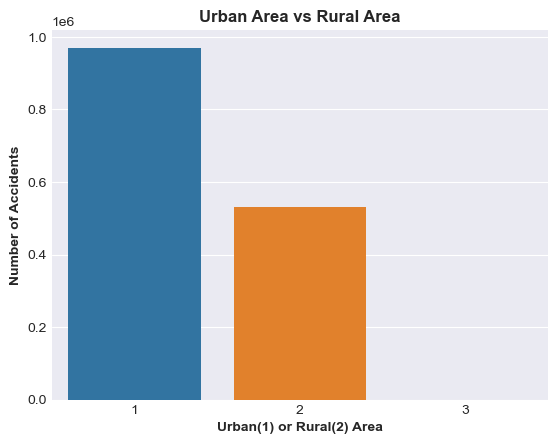

In [13]:
data["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=data)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")

plt.show() 

- Bekenilen şekilde kentsel alanlarda kaza sayısı fazla olduğunu görüyoruz.

In [15]:
data.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,17:42,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,4,17:36,Dual carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,5,00:15,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,6,10:35,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,2,21:13,Single carriageway,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005


### Kategorik Değişkenleri analiz edelim.

In [16]:
data["Road_Type"].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [17]:
data["Road_Type"]=[1 if each == "Single carriageway" else 2
                          if each == "Dual carriageway" else 3
                          if each == "One way street" else 4
                          if each == "Roundabout" else 5
                          if each == "Slip road" else 6
                          for each in data["Road_Type"]]

In [18]:
data["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

In [19]:
data["Weather_Conditions"]=[1 if each == "Raining without high winds" else 2
                          if each == "Fine without high winds" else 3
                          if each == "Unknown" else 4
                          if each == "Snowing without high winds" else 5
                          if each == "Other" else 6
                          if each == "Fine with high winds" else 7
                          if each == "Raining with high winds" else 8
                          if each == "Fog or mist" else 9         
                          for each in data["Weather_Conditions"]]

In [20]:
data["Road_Surface_Conditions"].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)'], dtype=object)

In [21]:
data["Road_Surface_Conditions"]=[1 if each == "Wet/Damp" else 2
                          if each == "Dry" else 3
                          if each == "Frost/Ice" else 4
                          if each == "Snow" else 5       
                          for each in data["Road_Surface_Conditions"]]

In [22]:
data["Light_Conditions"].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [23]:
data["Light_Conditions"]=[1 if each == "Daylight: Street light present" else 2
                          if each == "Darkness: Street lights present and lit" else 3
                          if each == "Darkness: Street lighting unknown" else 4
                          if each == "Darkness: Street lights present but unlit" else 5  
                          if each == "Darkeness: No street lighting" else 6
                          for each in data["Light_Conditions"]]

In [24]:
data.drop(["Time"], axis=1, inplace=True)

In [25]:
data.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,1,1,1,1,1,2005
1,3,1,1,4,2,2,2,2,1,2005
2,3,2,1,5,1,2,2,2,1,2005
3,3,1,1,6,1,1,2,2,1,2005
4,3,1,1,2,1,3,2,1,1,2005


In [26]:
X = data.drop(["Accident_Severity"],axis=1).values
y = data["Accident_Severity"].values

### Modelleme
- Train ve Test datalarını ayıralım.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1201565, 9), (300392, 9), (1201565,), (300392,))

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
import time
from sklearn.ensemble import RandomForestRegressor

time_start = time.time()

# Train Modeli
regressor = RandomForestRegressor(n_estimators=100, max_features = 0.5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

time_end = time.time() # Modelin çalışma süresini tahmin edelim.
print(f'Run time : {time_end - time_start}')

Run time : 196.84774327278137


In [31]:
from sklearn import metrics

print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score:  0.13283201259550936
Testing score:   0.002481124784232347
RMSE: 0.40146704384236076


# KNN/ K- Nearest Neighbor Algoritması

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)

result1 = classification_report(y_test,y_pred)
print("Classifier Report")
print(result1)

result2 = accuracy_score(y_test,y_pred)
print("Accuracy Score")
print(result2)

Confusion Matrix
[[    17    333   3596]
 [    39   2082  38450]
 [    68   6634 249173]]
Classifier Report
              precision    recall  f1-score   support

           1       0.14      0.00      0.01      3946
           2       0.23      0.05      0.08     40571
           3       0.86      0.97      0.91    255875

    accuracy                           0.84    300392
   macro avg       0.41      0.34      0.33    300392
weighted avg       0.76      0.84      0.79    300392

Accuracy Score
0.8364803323657088
